# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import statsmodels.formula.api as smf

In [5]:
#linial model 'lm' con la función 'ols' de la libreria 'smf'(ventas en funcion del gasto en TV)
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

* El modelo lineal predictivo sería: Sales = 7.032594 + 0.047537 * TV

In [7]:
lm.pvalues #los p-values son tan pequeños que los parámetros son muy significativos y podemos garantizar que  no son 0

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
lm.rsquared #la eficacia del modelo(R^2)

0.611875050850071

In [9]:
lm.rsquared_adj #R^2 ajustado(un pelin mejor que el anterior)

0.6099148238341623

In [10]:
lm.summary() #para ver todo de golpe

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        20:39:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Nos interesa de la tabla de arriba para tener una buena predicción:**


   * R-square y Adj. R-square
   * P>|t| (el p-valor) tiene que ser muy bajo(aprox. 0)
   * F-statistic (alto) y su p-valor asociado (Prob(F-statistic) (debe ser muy bajo)
   * Intervalos de confianza ([0.025 0.975]) lejos del 0
   * Coeficientes (Coef): Si metemos una variable predictora, esta debería tener un valor mas alto que el anteirior.
   * Los indicadores de criterios AIC(akaique?) y BIC(el bayesiano) (cuantos mayores ean mejor). Podemos quedarnos con los valores de estos indicadores mas altos con el menor numero de variables predictoras

**Usamos el modelo para predecir ventas**

In [11]:
#pasamos a DataFrame la columna TV de data para que nos haga la prediccion de ventas usando solo los costes de TV
sales_pred = lm.predict(pd.DataFrame(data["TV"])) 
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

* **Ahora vamos a ver si esta prediccion se ajusta a los gastos reales**

In [12]:
import matplotlib.pyplot as plt

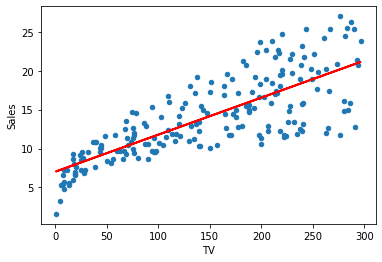

In [13]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales") #datos reales (puntos azules)
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2) #nuestro modelo(recta roja)

* **Calculamos el error standard residual (RSE) y su promedio (error)**

In [14]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [15]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [16]:
SSD = sum(data["RSE"]) #suma de los cuadrados de las diferencias
SSD

2102.5305838896525

In [17]:
#Desviacion típica de los residuos(RSE) 
RSE = np.sqrt(SSD/(len(data)-1-1)) #-1 al usar 1 variables predictoras, y otro -1 por la fórmula
RSE

3.258656369238098

* **Para ver cuanto representa esto respecto al promedio total de ventas:**

In [18]:
sales_m = np.mean(data["Sales"])

In [19]:
sales_m

14.022500000000003

In [20]:
error = RSE/sales_m #error promedio

In [21]:
error

0.2323876890168014

* **Vamos a ver como se distribuyen los errores respecto a nuestro modelo:**

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

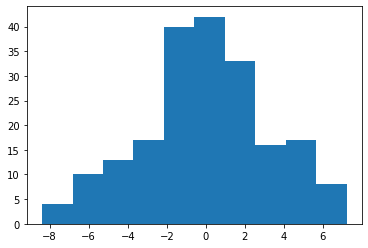

In [22]:
plt.hist((data["Sales"]-data["sales_pred"]))

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

### Reglas a seguir:
 * **Selección hacia atrás (o enfoque destructivo):** Uno empieza con un modelo que tenga todas las posibles variables predictoras añadadidas y se van descartando una por una. Si el p-valor de una variable predictora es lo suficientemente grande y el valor del R^2 (ajustado) no aumenta al ser eliminada, entonces esta variable predictora se rechaza, y sino sigue formando parte del modelo. O lo que es lo mismo, empezamos por un modelo lineal que utilice todas las variables como predictoras y nos quedamos con variables con las de menor p-valores y eliminar el resto(por ejemplo podemos marcar un p-valor limite de 0.5)
 * **Selección hacia adelante (o enfoque constructivo):** Empezamos con un modelo nulo sin variables predictoras y empezamos a añadir variables predictoras una por una. Una variable cuyo añadido al modelo resulte en un modelo que tenga un menor error residual de suma de los cuadrados residual, será la primera en añadirse al modelo (de todas, la que tenga menor suma de los cuadrados residuales). Si el p-valor para la variable es lo suficientemente pequeña y el valor del R^2 sube, entonces la variable predictora se irá incluyendo sucesivamente en el modelo, en caso contrario no se incluirá en el modelo. O lo que es lo mismo, también se puede empezar por añadir una variable al modelo que realmente incremente el valor de R^2. Luego ir añadiendo otras variables que nos vayan aumentando el R^2.

**1-** Vamos a comenzar con la **selección hacia adelante**, sabiendo ya que teniamos antes un modelo lineal bastante bueno de las ventas según la TV. Así que podemos ignorar el estudio de Vetas en función de radio o periodico, ya que tenian menor correlación que la de TV. Comenzaremos por ello con las ventas en función de la TV, e ir añadiendo otras variables.

In [23]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [24]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [53]:
lm2.pvalues #el modelo sugiere que los p-valores son buenos

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

* Sales = 5.774948+0.046901·TV + 0.044219·Newspaper

In [54]:
lm2.rsquared #vemos que crece respecto al R^2 de lm de más arriba (=0.611875050850071)

0.6458354938293271

In [55]:
lm2.rsquared_adj #vemos que crece respecto al R^2 ajustado de lm de más arriba (=0.6099148238341623)

0.6422399150864777

In [28]:
#hacemos las predicciones de las ventas en funcion primero de la TV y segundo de los periodicos
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [29]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

 * **Calculamos la desviacion estandard de los residuos (RSE) y su promedio (error)**

In [30]:
SSD = sum((data["Sales"]-sales_pred)**2) #Suma al cuadrado de las diferencias(SSD)

In [31]:
SSD # el de arriba nos daba 2102.5305838896525

1918.561811896827

In [32]:
RSE = np.sqrt(SSD/(len(data)-2-1)) #Desviacion típica de los residuos(RSE) [-2 al usar 2 variables predictoras, y -1 por la fórmula ]

In [33]:
RSE #el de arriba de una sola variable de la TV nos daba 3.258656369238098

3.120719860252885

In [34]:
error = RSE / sales_m

In [35]:
error #Arriba nos daba un promedio de error de 0.2323876890168014

0.22255089037282116

In [36]:
lm2.summary() #resumen global

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           3.95e-45
Time:                        20:39:58   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* **Conclusión: Añadir el periódico a nuestro modelo lineal de las ventas en función de la TV apenas modifica nuestro modelo, apenas aporta nada.**

**2-** Vamos a añadir ahora las ventas al modelo a ver qué pasa:

In [37]:
#Añadir la Radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [38]:
lm3.summary() #hacemos directamente el summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           4.83e-98
Time:                        20:39:59   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* **Vemos que el R^2 del modelo ha crecido bastante se acerca al 0.9, añadir esta variable está muy bien para el modelo (y el F-stadistico es grande y su p-valor asociado(Prob (F-statistic)) muy pequeño, lo que es bien también**

In [39]:
sales_pred = lm3.predict(data[["TV", "Radio"]]) #prediccion
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1)) #'-2' ya que tenemos 2 variables predictoras

In [40]:
RSE

1.6813609125080011

In [41]:
RSE/sales_m

0.1199045043685506

**3-** Ahora añadimos periodicos después de haber añadido Radio

In [42]:
#Añadir la Radio al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [43]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.58e-96
Time:                        20:40:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1)) #3 variables predictoras(-3)

In [45]:
RSE

1.6855103734147436

In [46]:
RSE/sales_m #vemos que el error sube respecto a TV+Radio (0.119...)

0.12020041885646235

* **Vemos que si añadimos el periodico nos va mal al modelo. El intervalo de confianza ([0.025 0.975]) coge el 0, y además el coeficiente de Newspapaer es negativo (-0.0010). Y con un p-valor cercano al 1. Hay que quitarlo.**

**Como vimos al final del notebook T3 - 1:**

In [56]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


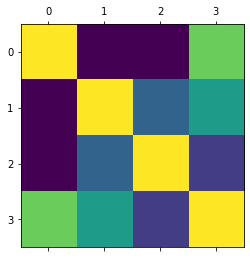

In [57]:
plt.matshow(data_ads.corr())

Hay bastante correlacion entre la radio y el periodico (*0.354104*). Que sea alto con las ventas es bueno, pero que sea altas entre las variables predicotras no. Esta correlación hace que aumente la variabilidad del coeficiente estimado para el modelo, por ello una varible predictora interactua negativamente con la otra.

Para solucionar esto se aplica un estadistico t(t-test) para estos coeficientes, y se calcula dividiendo por la variabilidad promedio (o el error). Si este error sube, el t estadistico baja y por lo tanto el p-valor se incrementa. Asi pues las probabilidades de que la hipótesis nula(la buena) para el contraste de hipótesis asociado al estadístico F sea aceptada, se incrementa. Por eso hemos visto porqué decrecia el t-estadístico en el test de arriba añadiendo los periodicos a la tele y la radio.

Para variables que estuvieran más correlacionadas entre ellas necesitariamos ir más al detalle y decidir cuál de ellas incluir en el modelo. Es una buena práctica identificar los pares de variables con alta correlación utilizándo una matriz de correlación(como la de arriba).

Para detectar esta multicolinaelidad entre variables se utiliza el **VIF** (el **factor de inflación de la varianza**). Este método cuantifica la aparicion de la variabilidad de un coeficiente estimado de una variable particular, debida a la correlacion de dos o mas de las variables predictoras. Esto hay que calcularlo para todas las varibales, y si este valor es muy alto para una variable en particular esta variable se elimina del modelo. 

Existe una función para calcular el **factor de inflación de la varianza**....pero primero lo haremos "a pelo".

## Multicolinealidad: 
Alude a la correlación de las variables predictoras de nuestro modelo.La multicolinealidad es lo que ha hecho que al añadir arriba el periodico, nuestro modelo vaya mucho peor.
### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.



In [49]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [50]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.00461078493965

In [51]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

* Vemos que la Radio no está correlacionada con ninguna, en cambio la TV y el periodico sí. Nos quedmos con la Radio en vez del Periódico ya que nos da un VIF menor ( Radio_TV+ Newspaper frente al Newspapaer_TV+Radio). Que es el modelo lineal 3 calculado antes(lm3).

In [52]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           4.83e-98
Time:                        20:40:05   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""